<a href="https://colab.research.google.com/github/ariftoteles/Telecom-Customer-Churn/blob/master/Notebook/Telcom_Customer_Churn_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model (XGBoosting)


## Load Library and Dataset

In [3]:
pip install xgboost

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [6]:
pd.set_option("display.max_columns", 22)
telcom = pd.read_csv('telcom_clean1.csv')
telcom.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,...,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


In [7]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   Churn                                    7032 non-null   int64  
 7   gender_Female                            7032 non-null   int64  
 8   gender_Male                              7032 non-null   int64  
 9   MultipleLines_No                         7032 non-null   int64  
 10  MultipleLines_No phone service           7032 no

# 1. Percobaan 1 (Imbalance Dataset)

- Training Model menggunakan Imbalance dataset
- Pada Model ini saya akan menggunakan semua feature sebagai variable prediktor kecuali Customer ID

### Spliting Data

In [8]:
## train test split
pd.set_option("display.max_columns", 33)
#splitting train and test data 
feature    = telcom.drop(columns=['customerID','Churn'])
target = telcom['Churn']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)
feature.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', '

In [0]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)
test_X = np.array(test_X)
test_Y = np.array(test_Y)

### Deklarasi Model Xgboost

__Xgboost__

In [16]:
param =             {"learning_rate"    : [0.2] ,
                     "max_depth"        : [3],
                     "min_child_weight" : [5],
                     "gamma"            : [0.2],
                     "colsample_bytree" : [0.3] }

xgb = XGBClassifier()
xgb_tune = RandomizedSearchCV(xgb, param,cv=5 , n_iter=10, random_state=20,verbose=1)
xgb_tune.fit(train_X, train_Y)
print(xgb_tune.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


{'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.3}


### Evaluation

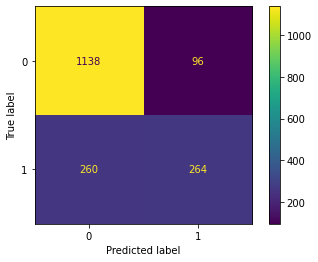

In [17]:
plot_confusion_matrix(xgb_best,test_X,test_Y,values_format='0.0f')

In [18]:
print('\n\nXGB Train\n',classification_report(train_Y,xgb_tune.predict(train_X)))
print('\n\nXGB Test\n',classification_report(test_Y,xgb_tune.predict(test_X)))



XGB Train
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3929
           1       0.72      0.56      0.63      1345

    accuracy                           0.83      5274
   macro avg       0.79      0.74      0.76      5274
weighted avg       0.82      0.83      0.82      5274



XGB Test
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1234
           1       0.73      0.50      0.60       524

    accuracy                           0.80      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758



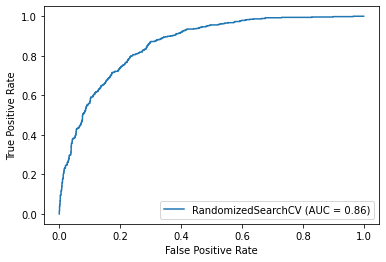

In [20]:
plot_roc_curve(xgb_tune,test_X,test_Y)

## Exclude Feature Monthly Charges dan Total Charges

Pada Model ini saya tidak akan menggunakan Monthly Charges dan Total Charges untuk memprediksi model. Kemudian saya akan membandingkan dengan model sebelumnya yang menggunakan feature MonthlyCharges dan Total Charges

### Spliting Data

In [0]:
train_X1 = train_X[:,:-2]
test_X1 = test_X[:,:-2]
train_Y1 = train_Y
test_Y1 = test_Y

### Hyper Parameter Tuning

__Logistic Regression__

In [23]:
# {'xgbclassifier__colsample_bytree': 0.7,
#  'xgbclassifier__gamma': 0.2,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 5,
#  'xgbclassifier__min_child_weight': 7}
param =             {"learning_rate"    : [0.05] ,
                     "max_depth"        : [5] ,
                     "min_child_weight" : [7],
                     "gamma"            : [0.2],
                     "colsample_bytree" : [0.7] }

kf = KFold(n_splits=5, random_state=111, shuffle=False)

xgb_pipeline = make_pipeline(XGBClassifier())
new_params = {'xgbclassifier__' + key: param[key] for key in param}
xgb1_tune = GridSearchCV(xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
xgb1_tune.fit(train_X1, train_Y1)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                                      missing=None,
                  

In [0]:
# xgb1_tune.best_params_

# {'xgbclassifier__colsample_bytree': 0.7,
#  'xgbclassifier__gamma': 0.2,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 5,
#  'xgbclassifier__min_child_weight': 7}

{'xgbclassifier__colsample_bytree': 0.7,
 'xgbclassifier__gamma': 0.2,
 'xgbclassifier__learning_rate': 0.05,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 7}

In [24]:
print('\n\nXGB Train\n',classification_report(train_Y1,xgb1_tune.predict(train_X1)))
print('\n\nXGB Test\n',classification_report(test_Y1,xgb1_tune.predict(test_X1)))



XGB Train
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      3929
           1       0.69      0.54      0.60      1345

    accuracy                           0.82      5274
   macro avg       0.77      0.73      0.74      5274
weighted avg       0.81      0.82      0.81      5274



XGB Test
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.51      0.60       524

    accuracy                           0.80      1758
   macro avg       0.78      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



# 2. Percobaan 2 (Under Sampling)

Dalam dataset ini __class 0__ : 5163, sedangkan __class 1__ : 1869, saya akan menggunakan ```NearMiss``` untuk menyeimbangkan class, teknik ini akan menghapus beberapa sample majority class yaitu __class 0__ sehingga jumlahnya sama dengan minority __class 1__ , ```NearMiss``` akan menghapus majority class yang memiliki jarak terdekat dari minority class.[source](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

In [0]:
train_X2 = train_X1.copy()
train_Y2 = train_Y1.copy()
test_X2 = test_X1
test_Y2 = test_Y1

In [26]:
# {'xgbclassifier__colsample_bytree': 0.3,
#  'xgbclassifier__gamma': 0.4,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 7}
param =             {"learning_rate"    : [0.05] ,
                     "max_depth"        : [3],
                     "min_child_weight" : [7],
                     "gamma"            : [0.4],
                     "colsample_bytree" : [0.3 ] }

kf = KFold(n_splits=5, random_state=111, shuffle=False)

xgb_pipeline = make_pipeline(NearMiss(),XGBClassifier())
new_params = {'xgbclassifier__' + key: param[key] for key in param}
xgb2_tune = GridSearchCV(xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
xgb2_tune.fit(train_X2, train_Y2)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('nearmiss',
                                        NearMiss(n_jobs=1, n_neighbors=3,
                                                 n_neighbors_ver3=3,
                                                 random_state=None, ratio=None,
                                                 return_indices=False,
                                                 sampling_strategy='auto',
                                                 version=1)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=...
                                                      seed=None, silent=None,
                     

In [0]:
# xgb2_tune.best_params_

# {'xgbclassifier__colsample_bytree': 0.3,
#  'xgbclassifier__gamma': 0.4,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 7}

In [27]:
print('\n\nXGB Train\n',classification_report(train_Y2,xgb2_tune.predict(train_X2)))
print('\n\nXGB Test\n',classification_report(test_Y2,xgb2_tune.predict(test_X2)))



XGB Train
               precision    recall  f1-score   support

           0       0.90      0.41      0.56      3929
           1       0.34      0.87      0.48      1345

    accuracy                           0.53      5274
   macro avg       0.62      0.64      0.52      5274
weighted avg       0.76      0.53      0.54      5274



XGB Test
               precision    recall  f1-score   support

           0       0.89      0.44      0.59      1234
           1       0.40      0.87      0.54       524

    accuracy                           0.57      1758
   macro avg       0.64      0.65      0.56      1758
weighted avg       0.74      0.57      0.57      1758



# 3. Percobaan 3 (Random Over Sampling)

Pada percobaan ke 3 ini saya akan menggunakan ```RandomOverSampler``` untuk menyeimbangkan class, teknik ini akan menduplikasi minority class (__class 1__) secara random sehingga total __class 1__ akan sama dengan majority class  (__class 0__)

In [0]:
train_X3 = train_X1
train_Y3 = train_Y1
test_X3 = test_X1
test_Y3 = test_Y1

In [29]:
# {'xgbclassifier__colsample_bytree': 0.5,
#  'xgbclassifier__gamma': 0.4,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 1}
param =             {"learning_rate"    : [0.05] ,
                     "max_depth"        : [ 3],
                     "min_child_weight" : [ 1],
                     "gamma"            : [0.4],
                     "colsample_bytree" : [0.5] }

kf = KFold(n_splits=5, random_state=111, shuffle=False)

xgb_pipeline = make_pipeline(RandomOverSampler(),XGBClassifier())
new_params = {'xgbclassifier__' + key: param[key] for key in param}
xgb3_tune = GridSearchCV(xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
xgb3_tune.fit(train_X3, train_Y3)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomoversampler',
                                        RandomOverSampler(random_state=None,
                                                          ratio=None,
                                                          return_indices=False,
                                                          sampling_strategy='auto')),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_byt...
                                                      seed=None,

In [0]:
# xgb3_tune.best_params_

# {'xgbclassifier__colsample_bytree': 0.5,
#  'xgbclassifier__gamma': 0.4,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 1}

{'xgbclassifier__colsample_bytree': 0.5,
 'xgbclassifier__gamma': 0.4,
 'xgbclassifier__learning_rate': 0.05,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__min_child_weight': 1}

In [30]:
print('\n\nXGB Train\n',classification_report(train_Y3,xgb3_tune.predict(train_X3)))
print('\n\nXGB Test\n',classification_report(test_Y3,xgb3_tune.predict(test_X3)))



XGB Train
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      3929
           1       0.51      0.79      0.62      1345

    accuracy                           0.76      5274
   macro avg       0.71      0.77      0.72      5274
weighted avg       0.81      0.76      0.77      5274



XGB Test
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1234
           1       0.58      0.78      0.66       524

    accuracy                           0.76      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.80      0.76      0.77      1758



# 4. Percobaan 4 (SMOTE)

Pada percobaan ke 4 ini saya akan menggunakan ```SMOTE``` _Synthetic Minority Oversampling Technique_ untuk menyeimbangkan class sehingga minority class akan memiliki jumlah yang sama dengan majority class, berbeda dengan Random Over Sample, SMOTE membuat instance data baru berdasarkan jarak euclidian terdekat, teknik ini mengadopsi algoritma K-Nearest Neighbors.[source](http://etd.repository.ugm.ac.id/home/detail_pencarian/157692)

In [0]:
train_X4 = train_X1
train_Y4 = train_Y1
test_X4 = test_X1
test_Y4 = test_Y1

In [32]:
# {'xgbclassifier__colsample_bytree': 0.7,
#  'xgbclassifier__gamma': 0.2,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 7}
param =             {"learning_rate"    : [0.05] ,
                     "max_depth"        : [ 3],
                     "min_child_weight" : [ 7 ],
                     "gamma"            : [ 0.2],
                     "colsample_bytree" : [ 0.7 ] }

kf = KFold(n_splits=5, random_state=111, shuffle=False)

xgb_pipeline = make_pipeline(SMOTE(),XGBClassifier())
new_params = {'xgbclassifier__' + key: param[key] for key in param}
xgb4_tune = GridSearchCV(xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
xgb4_tune.fit(train_X4, train_Y4)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5...
                                                      seed=None, silent=None,
                                                      subsample=1,
                                                      verbosity=1))],
        

In [0]:
# xgb4_tune.best_params_

# {'xgbclassifier__colsample_bytree': 0.7,
#  'xgbclassifier__gamma': 0.2,
#  'xgbclassifier__learning_rate': 0.05,
#  'xgbclassifier__max_depth': 3,
#  'xgbclassifier__min_child_weight': 7}

{'xgbclassifier__colsample_bytree': 0.7,
 'xgbclassifier__gamma': 0.2,
 'xgbclassifier__learning_rate': 0.05,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__min_child_weight': 7}

In [34]:
print('\n\nXGB Train\n',classification_report(train_Y4,xgb4_tune.predict(train_X4)))
print('\n\nXGB Test\n',classification_report(test_Y4,xgb4_tune.predict(test_X4)))



XGB Train
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      3929
           1       0.57      0.72      0.63      1345

    accuracy                           0.79      5274
   macro avg       0.73      0.77      0.74      5274
weighted avg       0.81      0.79      0.80      5274



XGB Test
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1234
           1       0.63      0.71      0.67       524

    accuracy                           0.79      1758
   macro avg       0.75      0.77      0.76      1758
weighted avg       0.80      0.79      0.79      1758



# Best Model

In [35]:
## ROC-AUC
a = roc_auc_score(test_Y1, xgb1_tune.predict_proba(test_X1)[:,1])
b = roc_auc_score(test_Y2, xgb2_tune.predict_proba(test_X2)[:,1])
c = roc_auc_score(test_Y3, xgb3_tune.predict_proba(test_X3)[:,1])
d = roc_auc_score(test_Y4, xgb4_tune.predict_proba(test_X4)[:,1])

## Accuracy

e = classification_report(test_Y1,xgb1_tune.predict(test_X1),output_dict=True)['accuracy']
f = classification_report(test_Y2,xgb2_tune.predict(test_X2),output_dict=True)['accuracy']
g = classification_report(test_Y3,xgb3_tune.predict(test_X3),output_dict=True)['accuracy']
h = classification_report(test_Y4,xgb4_tune.predict(test_X4),output_dict=True)['accuracy']

## Precision,Recall,F1

i = classification_report(test_Y1,xgb1_tune.predict(test_X1),output_dict=True)['1']
j = classification_report(test_Y2,xgb2_tune.predict(test_X2),output_dict=True)['1']
k = classification_report(test_Y3,xgb3_tune.predict(test_X3),output_dict=True)['1']
l = classification_report(test_Y4,xgb4_tune.predict(test_X4),output_dict=True)['1']

model = pd.DataFrame({'Model':['Logistic Regression1','Logistic Regression2','Logistic Regression3','Logistic Regression4'],
                      'AUC':[a,b,c,d],
                      'Accuracy':[e,f,g,h]})
report = pd.DataFrame([i,j,k,l])
report.drop(columns='support',inplace=True)
report5 = pd.concat([model,report],axis=1)
report5

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression1,0.861879,0.799772,0.738889,0.507634,0.601810
1,Logistic Regression2,0.669845,0.565415,0.395470,0.866412,0.543062
2,Logistic Regression3,0.858128,0.764505,0.577465,0.782443,0.664506
3,Logistic Regression4,0.859977,0.789534,0.630068,0.711832,0.668459


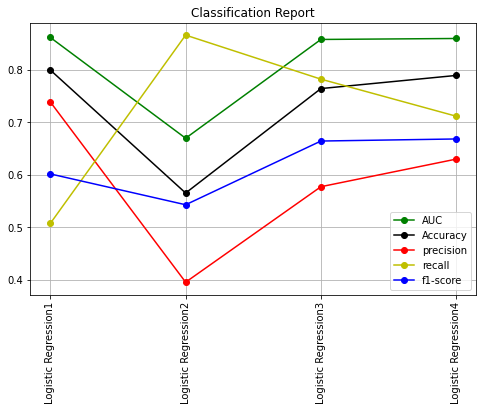

In [36]:
plt.figure(figsize=(8,5))
plt.plot(report5['Model'], report5['AUC'],'g-o',label='AUC')
plt.plot(report5['Model'], report5['Accuracy'],'k-o',label='Accuracy')
plt.plot(report5['Model'], report5['precision'],'r-o',label='precision')
plt.plot(report5['Model'], report5['recall'],'y-o',label='recall')
plt.plot(report5['Model'], report5['f1-score'],'b-o',label='f1-score')
plt.xticks(rotation=90);plt.title('Classification Report')
plt.grid(True)
plt.legend()
plt.show()

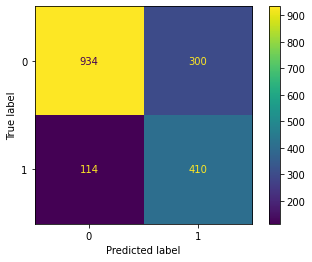

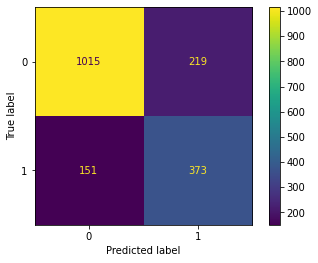

In [37]:
plot_confusion_matrix(xgb3_tune,test_X3,test_Y3,values_format='0.0f')
plot_confusion_matrix(xgb4_tune,test_X3,test_Y3,values_format='0.0f')

>__Model yang ditraining menggunakan dataset balance Random Over Sample sebagai model terbaik__

- Model Logistic Regression tidak over fitting

# Save Model

In [0]:
import joblib

In [0]:
# joblib.dump(lr3_tune,'lr_best_model')